In [257]:
""""
                                                Assignment No. 3
                                                
Ques No. 1) Implementation of LSI 
=============================================================================================================================

Steps:

1. Corpus given and query from user or from file
2. Calculation of term document matrix and query vector
3. Calculation of U, sigma and Vt i.e. SVD
4. Approximation by rank k of U, sigma, Vt and document
5. Calculating cosine similarity
6. Ranking the documents
===============================================================================================================================================================

Made by

Author: Mugdha Satish Kolhe
Enrollment No: BT17CSE043
Course Code: CSL-436
Course: Information Retrieval

"""

'"\n                                                Assignment No. 3\n                                                \nQues No. 1) Implementation of LSI \n=============================================================================================================================\n\nSteps:\n\n1. Corpus given and query\n2. Calculation of term document matrix and query vector\n3. Calculation of U, sigma and Vt i.e. SVD\n4. Approximation by rank k of U, sigma, Vt and document\n5. Calculating cosine similarity\n6. Ranking the documents\n===============================================================================================================================================================\n\nMade by\n\nAuthor: Mugdha Satish Kolhe\nEnrollment No: BT17CSE043\nCourse Code: CSL-436\nCourse: Information Retrieval\n\n'

In [247]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from numpy.linalg import svd, inv, norm
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt

In [248]:
#extraction of terms from documents
def extract_terms(D):
    vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")   #token for inculding single letter words too
    X = vectorizer.fit_transform(D)  
    terms = vectorizer.get_feature_names() #store the terms in a vector

    #terms in ascending order
    for i in range(len(terms)):
        print(terms[i])
    return X, terms, vectorizer
    

In [249]:
#customized print functions
def printer(A, name):
    print("\n\n"+name+"=", end="")
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if(j==0 and i>0):
                print("    ", end="  ")
            elif(j==0 and i==0):
                print("  ", end="  ")
            print("{:.4f}".format(A[i][j]), end="  ")
        print("")

def printer2(A, name):
    print("\n\n"+name+"=", end="")
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if(j==0 and i>0):
                print("   ", end="    ")
            elif(j==0 and i==0):
                print("  ", end="  ")
            print("{:.4f}".format(A[i][j]), end="  ")
        print("")

In [250]:
#Step 1(a): Set term weights and construct term- document matrix A
def term_doc(X):
    A = X.T.toarray()
    print("Term-document matrix:\n")
    print("        ", end="  ")
    for i in range(len(D)):
        j=i+1
        print("d", end="")
        print(j, end=" ")
    print("")

    print("A=", end="")
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if(j==0 and i>0):
                print("         ", end=" ") 
            elif(j==0 and i==0):
                print("       ", end=" ")
            print(A[i][j], end="  ")
        print(terms[i])
    print("")
    return A

In [251]:
#Step 1(b) Transforming the query into a vector
def trans_query(query, vectorizer):
    q = vectorizer.transform(query)
    q = q.toarray()
    q = q.T


    print("q = ", end="")
    for i in range(q.shape[0]):
        for j in range(q.shape[1]):
            if (i>0):
                print("    ",end="")
            print(q[i][j])
    return q

In [252]:
def initial_cosine(q, D, A):
    in_q_ = norm(q)
    qstr = "|q| =  "
    print(qstr, end="")
    print("{:.4f}".format(in_q_))

    #calculation of normalized reduced documents
    in_dnorm = np.empty(shape=(len(D),1),dtype='object') 
    in_di = np.empty(shape=(len(D),len(terms)),dtype='object') 

    for i in range(len(D)):
        in_dnorm[i]=norm(A[:, i:i+1])
        s = "|d"+str(i+1)+"| = "
        print(s, end="")
        print("{:.4f}".format(in_dnorm[i][0]))
    print("")

    #calculation of cosime-similarity score
    sim = np.empty(shape=(len(D),1),dtype='object') 
    for i in range(len(D)):
        x=A[:, i:i+1]
        sim[i] = (np.dot(q.T, x))/(in_q_*in_dnorm[i])
        s = "sim(q, d"+str(i+1)+") = "
        print(s, end="")
        print("{:.4f}".format(sim[i][0]))
    
    print("Ranking: ")
    li=[] 
  
    for i in range(len(sim)): #to get order of index
        li.append([sim[i],i]) 
    li.sort(reverse=True) #desc sort
    sort_index = [] 
  
    for x in li: 
        sort_index.append(x[1]) 
    
    for i in range(len(D)):
        print("d"+str(sort_index[i]+1), end="    ")
        print("{:.4f}".format(sim[sort_index[i]][0]))
        
    return sim

In [253]:
#Step 2: SVD of the Term-Document matrix
def svd_calc(A, D):
    
    print("\n\nSVD")
    [U, S, Vt] = svd(A, full_matrices=False)  #svd calculation

    np.set_printoptions(precision=4)
    printer(U, "U")
    S=np.diag(S)
    printer(S, "S")
    printer(Vt.T, "V")
    printer(Vt, "Vt")

    return U, S, Vt

In [254]:
#Step 3(a) rank k aproximation
def in_k():
    k = input("Enter value of k: ")   # take input from user 
    k = int(k)
    return k

In [255]:
#Step 3(b) Approximating by implementing rank k algorithm

def new_U_S_V(U, S, Vt, k, D):
    print("\n\nNew U, S and Vt: ")
    Uk = U[:, 0:k]      #reducing col of U to k
    printer2(Uk, "Uk")

    Sk = S[0:k, 0:k]   #reducing row and col of S to k
    printer2(Sk, "Sk")

    Vkt = Vt[0:k, :]   #reducing rows of V to k
    printer2(Vkt.T, "Vk")
    printer2(Vkt, "Vkt")
    
    return Uk, Sk, Vkt

In [256]:
#Step 4: New document vector coordinates in reducked k dimentional space
def new_doc(Vkt, D):
    print("\n\nNew Document: ")
    d = np.empty(shape=(len(D),k),dtype='object') 

    for i in range(len(D)):   #doc is Vkt.T
        d[i]=Vkt.T[i:i+1, :]
        dname="d"+str(i+1)
        print(dname+" = ", end="  ")
        for j in range(k):
            print("{:.4f}".format(d[i][j]), end="     ")
        print("")
    return d

In [257]:
#Step 5: New query vector cordinates in reducded k vector space
def new_query(q, Uk, Sk, D):  #new query now is q.T*Uk*Sk
    print("\n\nNew Query: ")
    new_q = np.dot(np.dot(q.T,Uk), inv(Sk))
    printer(new_q, "q")
    return new_q

In [258]:
#Step 6 (a) Cosine - Similarity

#calculation of normalized reduced queries
def cosine(new_q, d, D):
    print("\n\nCosine Similarities: ")
    q_ = norm(new_q)
    qstr = "|q| =  "
    print(qstr, end="")
    print("{:.4f}".format(q_))

    #calculation of normalized reduced documents
    dnorm = np.empty(shape=(len(D),1),dtype='object') 
    for i in range(len(D)):
        dnorm[i]=norm(d[i])
        s = "|d"+str(i+1)+"| = "
        print(s, end="")
        print("{:.4f}".format(dnorm[i][0]))
    print("")

    #calculation of cosime-similarity score
    sim = np.empty(shape=(len(D),1),dtype='object') 
    for i in range(len(D)):
        sim[i] = (np.dot(new_q, d[i].T))/(q_*dnorm[i])   #cosine = q.d/(|q|.|d|)
        s = "sim(q, d"+str(i+1)+") = "
        print(s, end="")
        print("{:.4f}".format(sim[i][0]))
    return sim


In [259]:
#Step 6(b) Ranking documents according to cosine similarity
def ranking(sim, D):
    print("\n\nRanking: ")
    li=[] 
  
    for i in range(len(sim)): 
          li.append([sim[i],i]) 
    li.sort(reverse=True)
    
    sort_index = [] 
  
    for x in li: 
        sort_index.append(x[1]) #sort in desc order and preserve index
    
    for i in range(len(D)):
        print("d"+str(sort_index[i]+1), end="    ")
        print("{:.4f}".format(sim[sort_index[i]][0]))

In [322]:
#accuracy = (final-initial/initial) *100
def Accuracy(in_sim, sim):
    diff = sim - in_sim
    #for i in range(sim.shape[0]):
     #   if in_sim[i][0]==0:
      #      in_sim[i][0]=0.1
    #diff = diff/in_sim
    n = diff.shape[0]
    acc = sum(diff)/n
    acc = acc*100
    if acc<0:
        acc = -acc
    s=str(acc[0])+"%"
    return s 

In [296]:
#plotting documents and their similarity scores
def plot_scores(n, sim):
    li = []
    for i in range(n):
        li.append(i+1)
    label = li[0:n] 
    index = np.arange(len(label))
    sm=[]
    for i in range(n):
        sm.append(sim[i][0])
    plt.bar(index, sm)
    plt.xlabel('Documents', fontsize=10)
    plt.ylabel('Cosine Score', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Cosine Similarity Scores')
    plt.show()

In [297]:
#corpus (ref: Grossman and Friders's Information Retrieval, ALgorithm and Heuristics)

D = [
    'Shipment of gold damaged in a fire',     
     'Delivery of silver arrived in a silver truck.',   
     'Shipment of gold arrived in a truck.'
    ]



In [299]:
#doc input from file
no = int(input("Enter no. of documents: "))
D = []
for i in range(no):
    s = "input"+str(i+1)+".txt"
    with open (s, "r") as myfile:
        data = ' '.join([line.replace('\n', '') for line in myfile.readlines()])
    D.append(data) 
print(D)

Enter no. of documents: 3
['Christmas is celebrated on December 25 every year, and it is a cultural festival of the Christian community. It marks the birth of Jesus to Mother Mary. It is said that Jesus was born in a stable and was a good shepherd. The life of Jesus was one of hardships and sacrifices, and Christmas aims to acknowledge that fact. Christmas is a public holiday in all the countries and is celebrated by non-Christians too as it is a festival that integrates people of all cultures. The central theme of Christmas celebrations is to have a spirit of sharing, kindness, and empathy towards one another.', 'The date of the winter solstice in the Roman Calendar marks the birth of Jesus. It is commonly celebrated on December 25 all across the globe. The festival encourages us to make merry and be happy. Its sole aim is to teach us that the light of the lord always guards us and that we must never lose hope. Jesus was born as a ray of hope to the oppressed masses. The birth of Jesu

In [300]:
#query input from user
def Convert(string): 
    li = list(string.split("\n")) 
    return li 

#query to be searched
#query = ['gold silver truck']
query=input("Enter the query to be searched: ")
query=query.split("\n")


Enter the query to be searched: christmas tree all


In [301]:
[X, terms, v] = extract_terms(D)  #from doc extracting terms
q = trans_query(query, v) #translating query to vector
A = term_doc(X)  #A is the term-document matrix
in_sim = initial_cosine(q, D, A)  #calculating similarity scores of initial matrixes
[U, S, Vt] = svd_calc(A, D) #calculating U, sigma and Vt

25
a
acknowledge
across
activity
aim
aims
all
always
amazing
an
and
another
are
as
assisted
be
beautiful
bells
birth
born
brings
by
calendar
can
cannot
celebrate
celebrated
celebrations
central
children
christian
christians
christmas
claus
commonly
community
countries
cultural
cultures
date
december
decorating
done
during
each
empathetic
empathy
encourages
end
every
exchange
fact
festival
filled
for
fun
get
gifts
globe
good
guards
happy
hardships
have
helping
holiday
hope
imaginary
in
integrates
is
it
its
jesus
joy
kids
kindness
leave
life
light
lord
lose
make
many
marks
mary
masses
merry
miss
most
mother
must
need
needy
never
non
of
on
one
oppressed
ornaments
other
others
out
parents
people
plenty
poor
public
putting
ray
roman
sacrifices
said
santa
saw
share
sharing
shepherd
so
sole
solstice
spirit
stable
such
sufferings
t
taught
teach
tell
that
the
their
them
theme
they
time
to
together
too
towards
tree
trinkets
up
us
was
we
when
who
winter
with
wonâ
work
year
q = 0
    0
    0
    0

      -0.0098  0.0210  0.0962  
      -0.0098  0.0210  0.0962  
      -0.0292  -0.0604  -0.0017  
      -0.0256  0.0609  -0.0348  
      -0.4125  -0.0570  -0.2577  
      -0.0646  0.0215  0.0596  
      -0.0512  0.1218  -0.0697  
      -0.0292  -0.0604  -0.0017  
      -0.0098  0.0210  0.0962  
      -0.0390  -0.0394  0.0945  
      -0.0098  0.0210  0.0962  
      -0.0098  0.0210  0.0962  
      -0.0098  0.0210  0.0962  
      -0.0937  -0.0389  0.0579  
      -0.0292  -0.0604  -0.0017  
      -0.0098  0.0210  0.0962  
      -0.0256  0.0609  -0.0348  
      -0.0098  0.0210  0.0962  
      -0.0292  -0.0604  -0.0017  
      -0.0292  -0.0604  -0.0017  
      -0.0256  0.0609  -0.0348  
      -0.0256  0.0609  -0.0348  
      -0.0098  0.0210  0.0962  
      -0.0292  -0.0604  -0.0017  
      -0.0098  0.0210  0.0962  
      -0.0256  0.0609  -0.0348  
      -0.0256  0.0609  -0.0348  
      -0.0098  0.0210  0.0962  
      -0.0292  -0.0604  -0.0017  
      -0.0292  -0.0604  -0.0017  
      -0.0256

In [302]:
k = in_k()    #k input from user
[Uk, Sk, Vkt] = new_U_S_V(U, S, Vt, k, D)   #calculating new U, s and Vt


Enter value of k: 3


New U, S and Vt: 


Uk=    -0.0548  0.0005  -0.0366  
       -0.1826  0.3050  -0.2108  
       -0.0256  0.0609  -0.0348  
       -0.0292  -0.0604  -0.0017  
       -0.0098  0.0210  0.0962  
       -0.0292  -0.0604  -0.0017  
       -0.0256  0.0609  -0.0348  
       -0.1095  0.0010  -0.0731  
       -0.0292  -0.0604  -0.0017  
       -0.0098  0.0210  0.0962  
       -0.0098  0.0210  0.0962  
       -0.2802  0.2682  0.1705  
       -0.0256  0.0609  -0.0348  
       -0.0196  0.0420  0.1924  
       -0.0548  0.0005  -0.0366  
       -0.0098  0.0210  0.0962  
       -0.0488  -0.0184  0.1906  
       -0.0098  0.0210  0.0962  
       -0.0098  0.0210  0.0962  
       -0.0839  -0.0599  -0.0383  
       -0.0548  0.0005  -0.0366  
       -0.0098  0.0210  0.0962  
       -0.0452  0.1029  0.1575  
       -0.0292  -0.0604  -0.0017  
       -0.0098  0.0210  0.0962  
       -0.0098  0.0210  0.0962  
       -0.0390  -0.0394  0.0945  
       -0.0803  0.0614  -0.0714  
       -0.025

In [303]:
d = new_doc(Vkt, D) #calculating new D vector
new_q = new_query(q, Uk, Sk, D)  #calculating new query vector



New Document: 
d1 =   -0.6391     0.6896     -0.3406     
d2 =   -0.7292     -0.6841     -0.0168     
d3 =   -0.2446     0.2376     0.9401     


New Query: 


q=    -0.0108  0.0327  0.0373  


In [304]:
sim=cosine(new_q, d, D)  #cosine similarity
ranking(sim, D)   #ranking



Cosine Similarities: 
|q| =  0.0508
|d1| = 1.0000
|d2| = 1.0000
|d3| = 1.0000

sim(q, d1) = 0.3305
sim(q, d2) = -0.2977
sim(q, d3) = 0.8956


Ranking: 
d3    0.8956
d1    0.3305
d2    -0.2977


In [323]:
a = Accuracy(in_sim, sim)  #accuracy
print(a)

12.453395364268049%


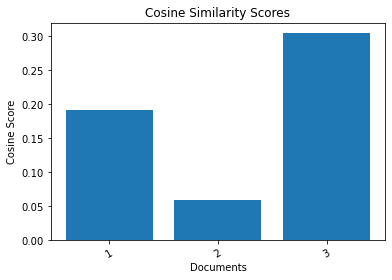

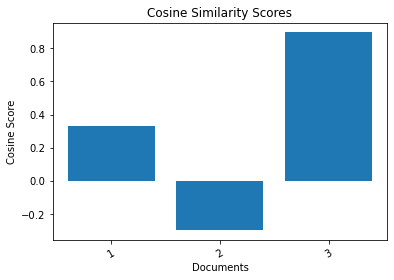

In [324]:
plot_scores(in_sim.shape[0], in_sim)  #plotting cosine similarity of initial U, S and Vt
plot_scores(sim.shape[0], sim)   #plotting cosine similarity of approximated U, S and Vt